# Numerically Solving Ordinary Differential Equations - Simple Vibration example

For a long time I have wondered about doing this in python. I first learned about numerically solving ordinary differenal equations (ODEs) in university. First it was doing it by hand in my numerical methods class, and then later for in my vibrations class, when we used MATLAB to solve them. 

In my graduate studies in control engineering, my thesis was on a multi body vibration system. I did the theoretical modelling using MATLAB and numerical methods.To do this I generally used the ODE45 method in MATLAB

I have never done this in python, and I recently cam across a book that did this and I thought it would be great do explore.  I this post I will look into the numerically solving a simple Single Degree of Freedom (SDOF) vibrations system, and solve its ordinary differential equations. 

The system will be a single spring mass damper system with one degree of freedom. 

We start by importing scipy, numpy and sympy


In [1]:
import scipy as sc
import numpy as np
import sympy as sym

from sympy import init_printing
init_printing()

The image below shows a basis of the system, a mass connected to a fixed reference plane through a spring and damper. 

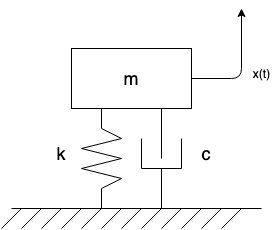

The image defines the direction of motion through $x(t)$ which can be used to infer the forces acting on the mass. I will use sympy to define the system:

In [2]:
# Define the system parameters
m, k, c, t = sym.symbols('m, k, c, t')

# Define the main 
x = sym.Function('x')


Useing newtons laws, we can balance the forces of the system. They are as follows:
- Acceleration forces: mass times acceleration
- Displacement force: displacement times spring stiffness
- Velocity force: velocity times the damping

All tho these should equal zero if the system is at rest, we can define it as follows:

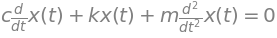

In [3]:
lhs = m * x(t).diff(t,2) + k * x(t) + c * x(t).diff(t,1)
eq_main = sym.Eq(lhs, 0)
eq_main

If you have studied simple vibrations, this equation should look familiar.

This is our final equation of motion. We can now solve for accelerations and arrive at our base equation. Note that the result of the sym.solve function returns a list with one element. If we want to use it further we need to call that one item, hence the use of `[0]` at the end of the function.

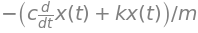

In [4]:
eq_acc = sym.solve(eq_main, x(t).diff(t,2))[0]
eq_acc

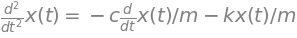

In [5]:
sym.Eq(x(t).diff(t,2), sym.expand(eq_acc))

To solve this numerically in python, I am going to use the older [sympy function odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). This functionality is similar to what I remember from MATLAB, but the current scipy points to the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) method. I will start here as it is the most familiar to me .

The odeint method takes in three parameters:
- function describing the first order system equations
- initial values of these (od the position at time = 0 s)
- and a time array of the points to evaluate

First the second order equation needs to be transformed into a system of first order equations. To do this we can define a system defined as y, which is made up of the displacement, and velocity:

$ y=\begin{cases}x(t)
\\\frac{d}{dt}x(t)\end{cases} $

Taking the derivative of this system of equations results in the following:

$\frac{d}{dt}y(t)=\begin{cases}\frac{d}{dt}x(t)
\\\frac{d^2}{dt^2}x(t)
\end{cases}$

Looking at the bottom equation, we can see it is equal the solution for acceleration from the equation of motion, or the the $\frac{d^2}{dt^2}x(t)$ part. This can now be substituted in, finalizing the system of equations:

$\frac{d}{dt}y(t)=\begin{cases}\frac{d}{dt}x(t)
\\-\frac{c}{m}\frac{d}{dt}x(t)-\frac{k}{m}x(t)
\end{cases}$

This is the first component needed for using odeint, it just needs to be defined in terms of a function. This can be described below:

In [6]:
def SDOF_system(y, t, m, k, c):
    x, dx = y
    dydt = [dx,
           -c/m*dx - k/m*x]
    return dydt

The function returns the first derivative of the system. We can then define some of our constants for the system:

In [7]:
m =0.25 # mass in kg
k= 1 # Spring Stiffnes N/m
c = 0.2# Dampening in Ns/m

The next requirement is the initial conditions of the system, or where the system is a time zero. I like to think of this as how the energy of the system is added. I image puulling the mass and holding it. This stretches the spring, inducing a displacement but has no initial velocity. Looking at the system equations, the first value os the displacement or $x(o)$, and the second is the velocity or $\frac{d}{dt}x(t)$ (which will be zero here):

In [8]:
y0 = [-2.0, 0.0]

Finally we can create a time series off all the points we want evaluated, in this case 10 seconds, with 1000 points to be evaluated at:

In [9]:
t = np.linspace(0, 10, 1000)

All of the parameters can be added to parameters of the odeint functions and a soluntion arrived at. The variable sol will consist of two numpy arrays. The first being displacement $x(t)$ and the second being velocity $\frac{d}{dt}x(t)$

In [10]:
from scipy.integrate import odeint 
sol = odeint(SDOF_system, y0, t, args=(m, k, c))

Plotting the results shows the displacement offset at $t = 0$ as being -2 as was defined with the velocity as zero.

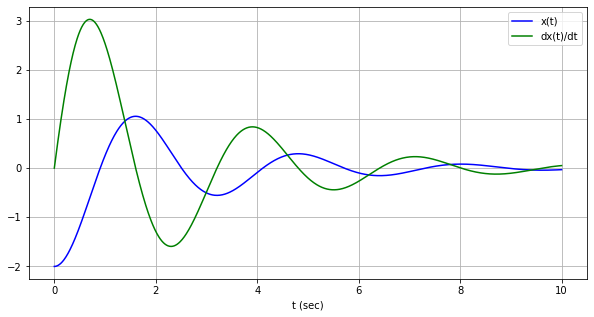

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='dx(t)/dt')
plt.legend(loc='best')
plt.xlabel('t (sec)')
plt.grid()

plt.show()

This is the basic premise of using the odeint function from the scipy library for numerically solving an ODE. This looked specifically at a SDOF vibration system. The key is always defining the system of equations, and when that is done it is pretty straight forward. In the future I will look at adding more complexities to the system, and exploring the other scipy functions.